In [1]:
from yucca.modules.data.augmentation.transforms.Spatial import Spatial
from yucca.modules.data.augmentation.transforms.BiasField import BiasField
from yucca.modules.data.augmentation.transforms.Noise import AdditiveNoise, MultiplicativeNoise
from yucca.modules.data.augmentation.transforms.Ghosting import MotionGhosting
from yucca.modules.data.augmentation.transforms.Ringing import GibbsRinging
import matplotlib.pyplot as plt
from nibabel.testing import data_path
import nibabel as nib
import os
from copy import deepcopy
import numpy as np

np.random.seed(420)

In [2]:
# We use a publicly available sample from Nibabel
example_file = os.path.join(data_path, "example4d.nii.gz")
im = nib.load(example_file)
imarr = im.get_fdata()[:, :, :, 0]

(-0.5, 95.5, 127.5, -0.5)

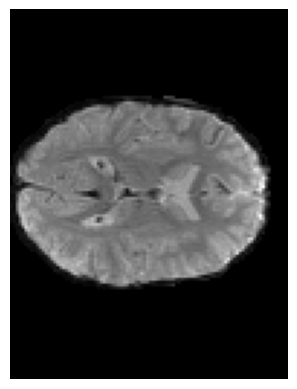

In [3]:
plt.imshow(imarr[:, :, 12], cmap="gray")
plt.axis("off")

In [4]:
# Convert it to the format expected of the transforms
# a dict of {"image": image, "seg": segmentation}
# with samples for dims (b, c, x, y, z) for 3D or (b, c, x, y) for 2D
imarr = imarr[np.newaxis, np.newaxis]
seg = np.zeros(imarr.shape)
datadict = {"image": imarr, "label": seg}

(-0.5, 95.5, 127.5, -0.5)

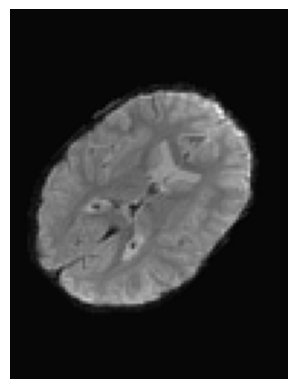

In [5]:
# Applying Rotation
tform = Spatial(x_rot_in_degrees=(0, 0), y_rot_in_degrees=(0, 0), z_rot_in_degrees=(45, 45))
im_tformed = tform(**deepcopy(datadict))
plt.imshow(im_tformed["image"][0, 0, :, :, 12], cmap="gray")
plt.axis("off")

(-0.5, 95.5, 127.5, -0.5)

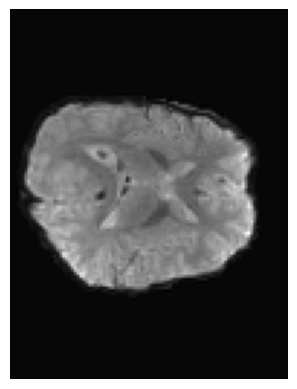

In [6]:
# Applying Deformation
tform = Spatial(deform_alpha=(700, 700), deform_sigma=(10, 10))
im_tformed = tform(**deepcopy(datadict))
plt.imshow(im_tformed["image"][0, 0, :, :, 12], cmap="gray")
plt.axis("off")

(-0.5, 95.5, 127.5, -0.5)

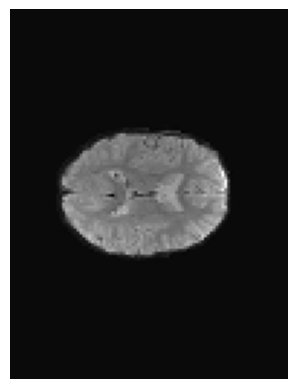

In [7]:
# Applying Scaling
tform = Spatial(scale_factor=(1.5, 1.5))
im_tformed = tform(**deepcopy(datadict))
plt.imshow(im_tformed["image"][0, 0, :, :, 12], cmap="gray")
plt.axis("off")

(-0.5, 95.5, 127.5, -0.5)

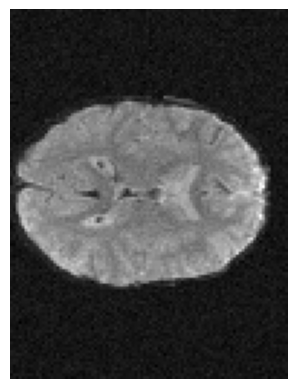

In [8]:
# Applying Additive Noise
tform = AdditiveNoise(p_per_sample=1, mean=(0, 0), sigma=(25, 25))
im_tformed = tform(**deepcopy(datadict))
plt.imshow(im_tformed["image"][0, 0, :, :, 12], cmap="gray")
plt.axis("off")

(-0.5, 95.5, 127.5, -0.5)

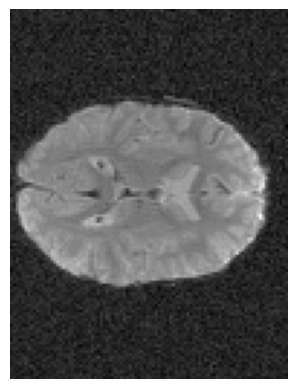

In [9]:
# Applying Multiplicative Noise
tform = MultiplicativeNoise(p_per_sample=1, mean=(0, 0), sigma=(0.1, 0.1))
im_tformed = tform(**deepcopy(datadict))
plt.imshow(im_tformed["image"][0, 0, :, :, 12], cmap="gray")
plt.axis("off")

(-0.5, 95.5, 127.5, -0.5)

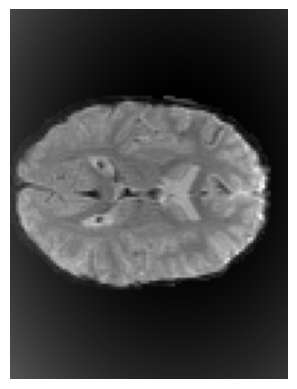

In [10]:
# Applying Bias Field
tform = BiasField(p_per_sample=1)
im_tformed = tform(**deepcopy(datadict))
plt.imshow(im_tformed["image"][0, 0, :, :, 12], cmap="gray")
plt.axis("off")

(-0.5, 95.5, 127.5, -0.5)

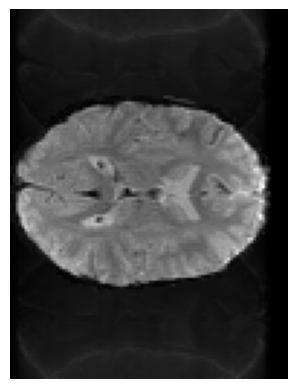

In [11]:
# Applying Motion Ghosting
tform = MotionGhosting(p_per_sample=1, alpha=(0.6, 0.6), numReps=(3, 4), axes=(0, 1))
im_tformed = tform(**deepcopy(datadict))
plt.imshow(im_tformed["image"][0, 0, :, :, 12], cmap="gray")
plt.axis("off")

(-0.5, 95.5, 127.5, -0.5)

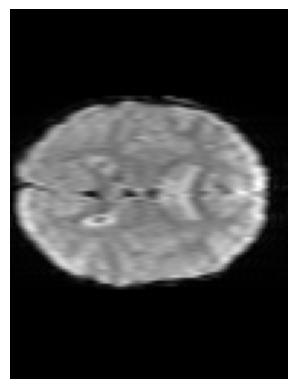

In [12]:
# Applying Gibbs Ringing
tform = GibbsRinging(p_per_sample=1, cutFreq=(30, 36), axes=(0, 1))
im_tformed = tform(**deepcopy(datadict))
plt.imshow(im_tformed["image"][0, 0, :, :, 12], cmap="gray")
plt.axis("off")

(-0.5, 95.5, 127.5, -0.5)

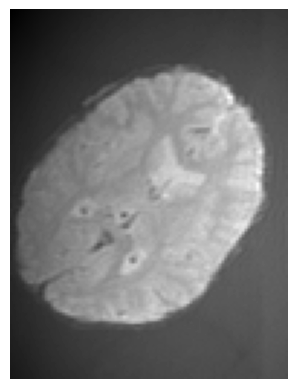

In [27]:
# Applying all augmentations subsequently
tform = Spatial(
    x_rot_in_degrees=(0, 0),
    y_rot_in_degrees=(0, 0),
    z_rot_in_degrees=(45, 45),
    deform_alpha=(700, 700),
    deform_sigma=(14, 14),
    scale_factor=(0.9, 0.9),
)
tform1 = GibbsRinging(p_per_sample=1, cutFreq=(64, 68), axes=(0, 1))
tform2 = MotionGhosting(p_per_sample=1, alpha=(0.8, 0.8), numReps=(3, 4), axes=(0, 1))
tform3 = BiasField(p_per_sample=1)
tform4 = AdditiveNoise(p_per_sample=1, mean=(0, 0), sigma=(0.01, 0.01))
tform5 = MultiplicativeNoise(p_per_sample=1, sigma=(0.01, 0.01))
im_tformed = tform(**deepcopy(datadict))
im_tformed = tform1(**im_tformed)
im_tformed = tform2(**im_tformed)
im_tformed = tform3(**im_tformed)
im_tformed = tform4(**im_tformed)
im_tformed = tform5(**im_tformed)

plt.imshow(im_tformed["image"][0, 0, :, :, 12], cmap="gray")
plt.axis("off")